<h3> Import required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import style
style.use('grayscale')
warnings.filterwarnings('ignore')

<h4> Read in the dataset

In [3]:
df= pd.read_csv('/Users/Brenden/Downloads/Dataset/CSV/drug200.csv')

<h4> Display the dataset

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


<h4> Check the number of rows & columns in the dataset

In [6]:
df.shape

(200, 6)

<h4> Get a more detailed overview of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<h3> Data preprocessing

In [8]:
#Changing the columns names to lowercase beacuse its easier for me to work with...Optional
df.columns= df.columns.str.lower()

<h4> Check the dataset for missing values

In [9]:
#check for missing values
df.isna().sum()

age            0
sex            0
bp             0
cholesterol    0
na_to_k        0
drug           0
dtype: int64

<h4> Check for any duplicate values in the dataset

In [10]:
#check for duplicate values
df.duplicated().sum()

0

<h4> Use Descriptive Statistics  to get a  sense of the numerical data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
na_to_k,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


<h3> Perform EDA to observe how the data is distributed

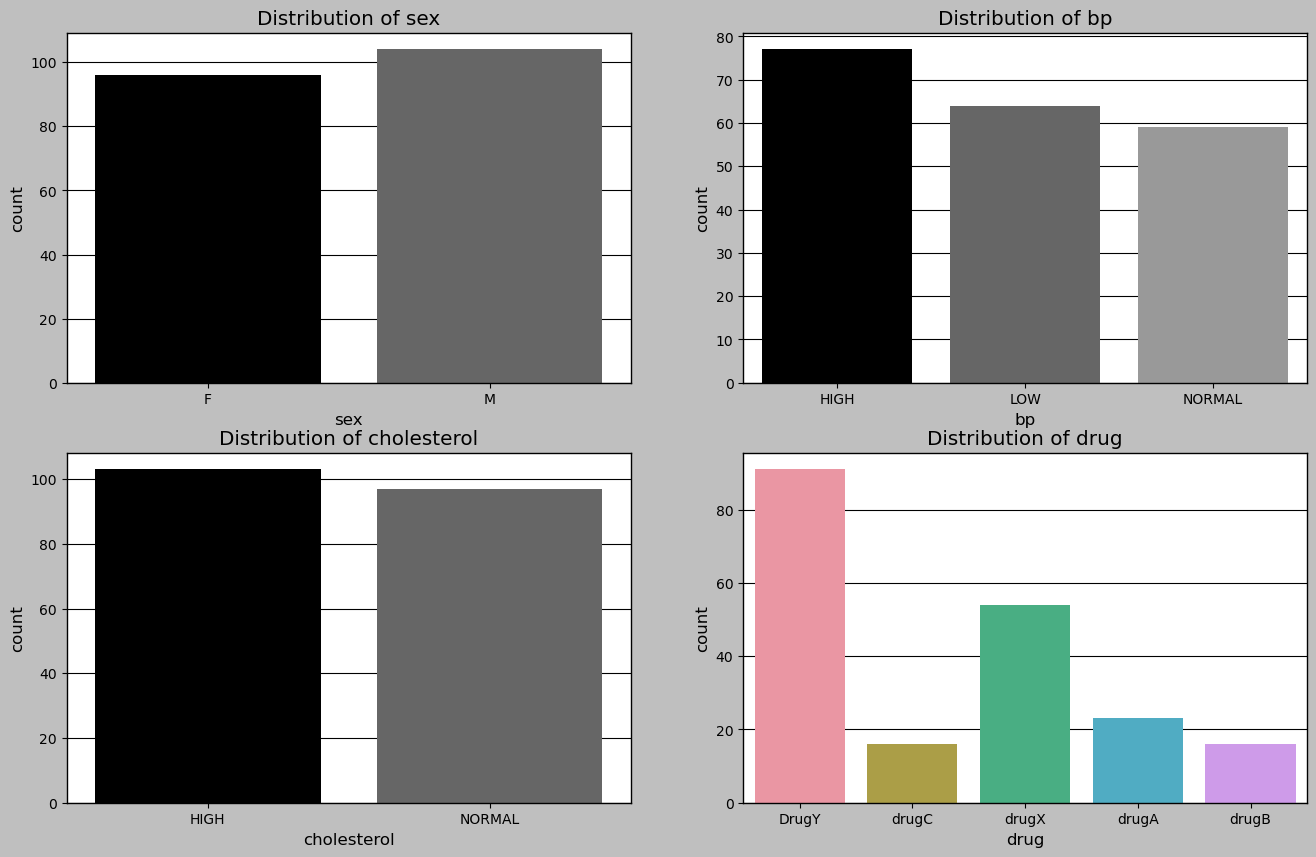

In [16]:
cat= ['sex','bp','cholesterol','drug'] #categorical features

plt.figure(figsize=(16,10))

for i, col in enumerate(cat):
    plt.subplot(2,2, i+1)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')

plt.show()

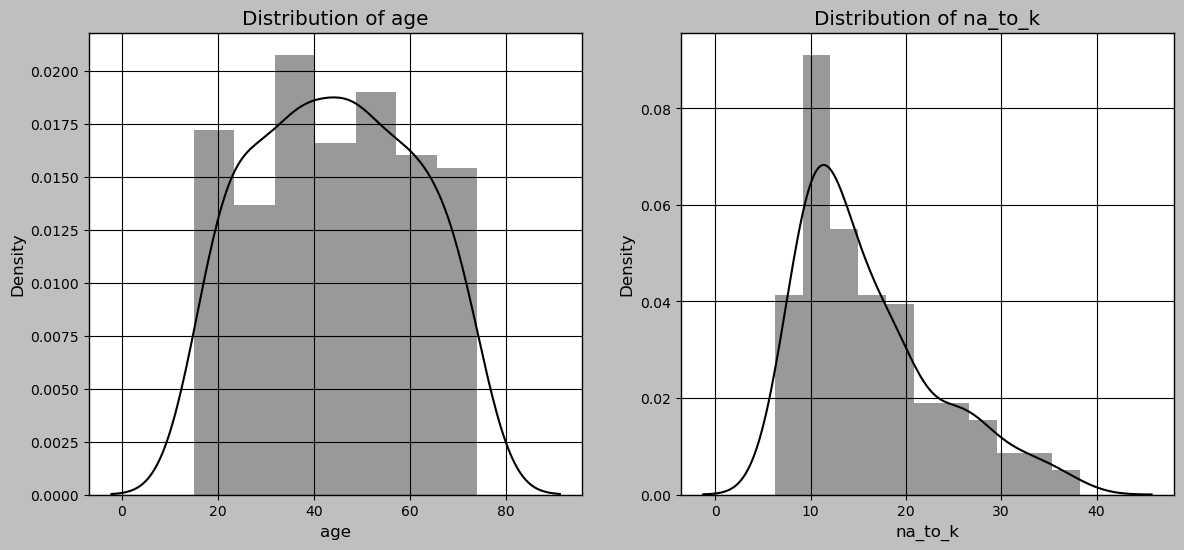

In [17]:
num= ['age','na_to_k',] #numerical data

plt.figure(figsize=(14,6))

for i, col in enumerate(num):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

<h3> Encode Categorical Data

In [18]:
df['sex']= df['sex'].map({'F':0,'M':1})

df['bp']= df['bp'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})

df['cholesterol']= df['cholesterol'].map({'NORMAL':0, 'HIGH':1})

df['drug']= df['drug'].map({'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'DrugY':4})

<h3> Scale the data

In [19]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [20]:
num = ['age','na_to_k']
for i in num:
    df[i]= sc.fit_transform(df[i].values.reshape(-1,1))

In [21]:
X= df.drop('drug',axis=1)
y= df['drug']

<h3> Split the dataset into Training & Testing set

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 5), (60, 5), (140,), (60,))

<h3> Import the models to be trained

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

<h2> Train the Models

<h4> Random Forest model

In [24]:
rf= RandomForestClassifier() #Create instance of RandomForest

rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred= rf.predict(X_test)
print(classification_report(y_test,y_pred))
acc1=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<h4> KNeighbors Model

In [26]:
knn= KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred= knn.predict(X_test)
print(classification_report(y_test,y_pred))
acc2=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      1.00      0.67         3
           2       1.00      0.33      0.50         6
           3       0.78      1.00      0.88        18
           4       1.00      0.85      0.92        26

    accuracy                           0.87        60
   macro avg       0.86      0.84      0.79        60
weighted avg       0.91      0.87      0.86        60



<h4> SVM Model

In [28]:
svm= SVC()

svm.fit(X_train,y_train)

SVC()

In [29]:
y_pred= svm.predict(X_test)
print(classification_report(y_test,y_pred))
acc3=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.43      1.00      0.60         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      0.92      0.96        26

    accuracy                           0.93        60
   macro avg       0.89      0.93      0.88        60
weighted avg       0.97      0.93      0.94        60



<H4> Logistic Regression Model

In [30]:
lr= LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred= lr.predict(X_test)
print(classification_report(y_test,y_pred))
acc4=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.75      1.00      0.86         3
           2       1.00      0.17      0.29         6
           3       0.78      1.00      0.88        18
           4       1.00      0.92      0.96        26

    accuracy                           0.88        60
   macro avg       0.88      0.82      0.78        60
weighted avg       0.91      0.88      0.86        60



<h3> Model Evaluation

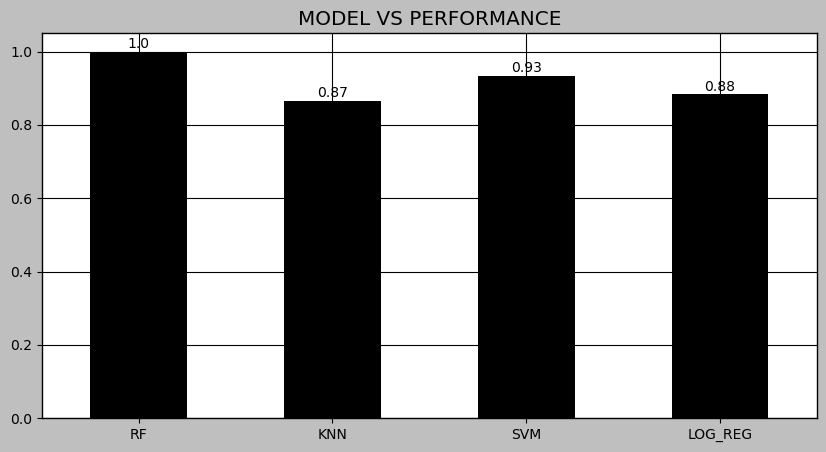

In [32]:
score= pd.Series([acc1,acc2,acc3,acc4],['RF','KNN','SVM','LOG_REG'])
score.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=0,ha='center')
plt.title('MODEL VS PERFORMANCE')
for i,v in enumerate(score):
    plt.text(i,v +0.01, str(round(v,2)),ha='center')

plt.show()

We can see that Random Forest model out performs the rest of the models ,attaining a perfect 100% accuracy.

<h4> Save the model

In [33]:
import pickle
pickle.dump(rf,open('./drug_rf.sav','wb'))